In [80]:
# Moneyball Formulas :
# Wins = 80.8814 + 0.1058*RunDifference
# AVG AL Playoff wins last year: 94.1
# 94.1 ≤ 80.8814 + 0.1058*RunDifference
#94.1 - 80.8814 = .0158*RD
#Run Differential = 124.94

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pybaseball as bb

#bb.cache.enable()


#EXAMPLE Team Lookup
teams = bb.team_ids(2021)
teams.head()
#print(teams)
#O's teamID: BAL
#O's franchID: BAL
#O's lgID: AL

#O's teamIDfg: 2 <--- Fangraphs
#O's teamIDBR: BAL <--- Baseball Reference
#O's teamIDretro: BAL <--- Baseball Savant (maybe)

,yearID,lgID,teamID,franchID,teamIDfg,teamIDBR,teamIDretro
2905,2021,AL,BAL,BAL,2,BAL,BAL
2906,2021,AL,BOS,BOS,3,BOS,BOS
2907,2021,AL,CHA,CHW,4,CHW,CHA
2908,2021,AL,CLE,CLE,5,CLE,CLE
2909,2021,AL,DET,DET,6,DET,DET


In [81]:
#Example Player Lookup
adley = bb.playerid_lookup('rutschman')
adley.head()
#print(adley)
#Adley key_mlbam:668939 
#Adley key_retro:rutsa001
#Adley key_bbref:rutscad01 
#Adley key_fangraphs: 26288

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,rutschman,adley,668939,rutsa001,rutscad01,26288,2022.0,2023.0


In [82]:
#Example Team Batting Query
os = bb.team_batting_bref('BAL', 2022)
print(os.columns)
os.head()


Index(['Pos', 'Name', 'Year', 'Age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+',
       'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB'],
      dtype='object')


,Pos,Name,Year,Age,G,PA,AB,R,H,2B,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
1,C,Adley Rutschman,2022.0,24,113,470,398,70,101,35,...,.362,.445,.806,130,177,4,4,0,3,0
2,1B,Ryan Mountcastle,2022.0,25,145,609,555,62,139,28,...,.305,.423,.729,107,235,12,4,0,7,1
3,2B,Rougned Odor,2022.0,28,135,472,426,49,88,19,...,.275,.357,.632,80,152,9,10,0,4,1
4,SS,Jorge Mateo,2022.0,27,150,533,494,63,109,25,...,.267,.379,.646,83,187,8,5,3,2,0
5,3B,Ramón Urías,2022.0,28,118,445,403,50,100,17,...,.305,.414,.720,104,167,7,5,3,4,1


In [83]:
adleybats = bb.statcast_batter('2022-04-01', '2022-12-30', player_id = 668939 )
adleybats

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,CH,2022-10-05,86.4,-1.48,6.09,"Rutschman, Adley",668939,669952,field_out,hit_into_play,...,4,4,2,2,4,Standard,Standard,211,-0.052,-0.371
1,FF,2022-10-05,93.0,-1.11,6.39,"Rutschman, Adley",668939,669952,None,foul,...,4,4,2,2,4,Standard,Standard,200,0.000,0.000
2,FF,2022-10-05,93.2,-1.32,6.37,"Rutschman, Adley",668939,669952,None,ball,...,4,4,2,2,4,Standard,Standard,199,0.000,0.089
3,FF,2022-10-05,92.8,-1.24,6.37,"Rutschman, Adley",668939,669952,None,foul,...,4,4,2,2,4,Standard,Standard,199,0.000,0.000
4,CH,2022-10-05,86.7,-1.44,6.09,"Rutschman, Adley",668939,669952,None,swinging_strike,...,4,4,2,2,4,Standard,Standard,208,0.000,-0.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,CU,2022-05-21,78.2,1.24,6.47,"Rutschman, Adley",668939,621363,None,ball,...,6,6,1,1,6,Standard,Standard,315,0.000,0.017
2005,FF,2022-05-21,91.9,-1.20,5.66,"Rutschman, Adley",668939,621248,None,called_strike,...,5,5,0,0,5,Infield shift,Standard,213,0.000,-0.024
2006,FF,2022-05-21,94.6,1.46,6.32,"Rutschman, Adley",668939,621363,None,foul,...,6,6,1,1,6,Standard,Standard,170,0.000,0.000
2007,FF,2022-05-21,93.1,1.29,6.33,"Rutschman, Adley",668939,621363,None,swinging_strike,...,6,6,1,1,6,Infield shift,Standard,169,0.000,-0.046


Method 1: WAR

In [84]:
from pybaseball import bwar_bat

# Get WAR stats from Baseball Reference
data = bwar_bat()

# Get WAR stats plus additional fields from this table 
data = bwar_bat(return_all=True)

# Filter for Baltimore Orioles in 2022
data_filtered = data[(data['year_ID'] == 2022)]

# Filter for the specific players and relevant columns
players = ['Cedric Mullins', 'Adley Rutschman', 'Ryan Mountcastle', 'Anthony Santander', 'Gunnar Henderson', 'Adam Frazier', 'Jorge Mateo', 'Kyle Stowers', 'Ramon Urias']
data_filtered = data_filtered.loc[data_filtered['name_common'].isin(players), ['name_common', 'PA', 'WAR']]

#Ramon Urias Unavailable, 2022 WAR was 3.6
new_row = {'name_common': 'Ramon Urias', 'PA': 445, 'WAR': 3.6}
data_filtered = data_filtered.append(new_row, ignore_index=True)
# Sort by WAR in descending order
sorted_data = data_filtered.sort_values('WAR', ascending=False).reset_index().drop('index', axis=1)
sorted_data

/var/folders/m4/bw9c_p2j76z4dr9m73_jbnd00000gn/T/ipykernel_64372/2143678923.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_filtered = data_filtered.append(new_row, ignore_index=True)


,name_common,PA,WAR
0,Adley Rutschman,470.0,5.24
1,Cedric Mullins,672.0,3.76
2,Ramon Urias,445.0,3.60
3,Jorge Mateo,533.0,3.40
4,Anthony Santander,647.0,2.07
5,Ryan Mountcastle,609.0,1.31
6,Gunnar Henderson,132.0,0.93
7,Adam Frazier,602.0,0.74
8,Kyle Stowers,98.0,-0.19


In [85]:
from pybaseball import bwar_pitch


# Get WAR stats plus additional fields from this table 
data_p = bwar_pitch(return_all=True)
#print(data.columns)
# Filter for Baltimore Orioles in 2022
data_filtered_p = data_p[(data_p['year_ID'] == 2022)]

# Filter for the specific players and relevant columns
players_p = ['Keegan Akin', 'Bryan Baker', 'Mike Baumann', 'Félix Bautista', 'Kyle Bradish', 'Yennier Cano', 'Danny Coulombe', 'Kyle Gibson', 'Dean Kremer', 'Cionel Pérez', 'Grayson Rodriguez', 'Austin Voth', 'Tyler Wells']
data_filtered_p = data_filtered_p.loc[data_filtered_p['name_common'].isin(players_p), ['name_common', 'G', 'WAR']]

# Sort by WAR in descending order
sorted_data_p = data_filtered_p.sort_values('WAR', ascending=False).reset_index().drop('index', axis=1)
sorted_data_p


ReadTimeout: HTTPConnectionPool(host='www.baseball-reference.com', port=80): Read timed out. (read timeout=None)

In [ ]:
import pandas as pd

# assuming sorted_data_batting and sorted_data_pitching are already defined
combined_data = pd.concat([sorted_data, sorted_data_p], ignore_index=True)

# sort by total WAR in descending order
combined_data = combined_data.sort_values('WAR', ascending=False).reset_index().drop('index', axis=1)

# print the combined data
combined_data
twar = combined_data['WAR'].sum()
print("Expected Team Total War:",twar)
# A team of 0 WAR Players would win 48 games, with a winning percentage of .294
print("Orioles wins by WAR :48 + twar = ",48+twar)

Expected Team Total War: 33.690000000000005
Orioles wins by WAR :48 + twar =  81.69


Method 2: Clustering

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pybaseball import team_batting,team_pitching

team_stats = pd.DataFrame()
x=2021
while x < 2023:
    tb = team_batting(x)
    tb = tb.loc[:,['Team','R']]
    tp = team_pitching(x)
    tp = tp.loc[:,['Team','R','W','L']]
    tp = tp.rename(columns={'R':'RA'})
    ts = pd.merge(tb,tp,on="Team")
    
    ts["Year"] = x
    ts["RD/GM"] = (ts['R']-ts['RA'])/162
    team_stats = pd.concat([team_stats,ts])
    x+=1
team_stats

,Team,R,RA,W,L,Year,RD/GM
0,TOR,846,663,91,71,2021,1.129630
1,HOU,863,658,95,67,2021,1.265432
2,BOS,829,749,92,70,2021,0.493827
3,SFG,804,594,107,55,2021,1.296296
4,CHW,796,636,93,69,2021,0.987654
5,CIN,786,760,83,79,2021,0.160494
6,LAD,830,561,106,56,2021,1.660494
7,WSN,724,820,65,97,2021,-0.592593
8,ATL,790,656,88,73,2021,0.827160
9,TBR,857,651,100,62,2021,1.271605


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

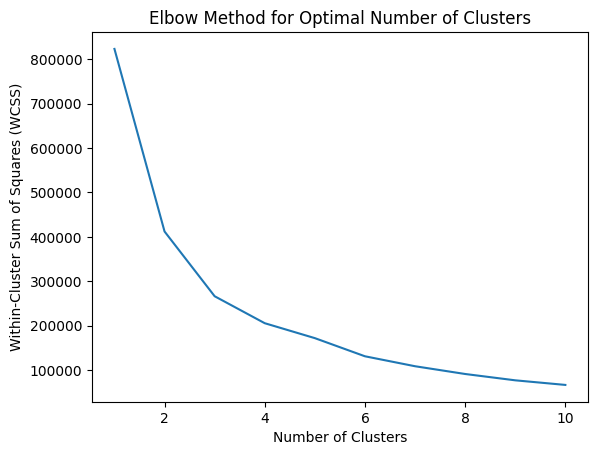

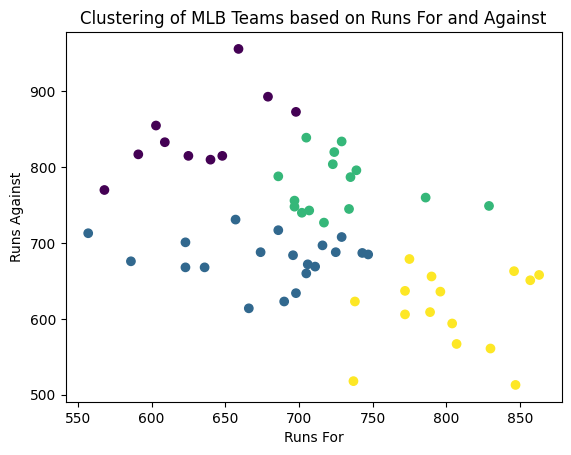

,Team,R,RA,W,L,Year,RD/GM,cluster_label
0,LAD,847,513,111,51,2022,2.061728,3
6,LAD,830,561,106,56,2021,1.660494,3
3,NYY,807,567,99,63,2022,1.481481,3
6,HOU,737,518,106,56,2022,1.351852,3
3,SFG,804,594,107,55,2021,1.296296,3
9,TBR,857,651,100,62,2021,1.271605,3
1,HOU,863,658,95,67,2021,1.265432,3
0,TOR,846,663,91,71,2021,1.129630,3
2,ATL,789,609,101,61,2022,1.111111,3
5,NYM,772,606,101,61,2022,1.024691,3


In [ ]:

# Select the features for clustering
X = team_stats[['R', 'RA']]
# Initialize a list to store the within-cluster sum of squares (WCSS)
wcss = []

# Try different numbers of clusters and calculate WCSS
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()
# Specify the number of clusters
num_clusters = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, n_init=100)
kmeans.fit(X)

# Assign the cluster labels to the data
team_stats['cluster_label'] = kmeans.labels_

# Visualize the clusters
plt.scatter(team_stats['R'], team_stats['RA'], c=team_stats['cluster_label'], cmap='viridis')
plt.xlabel('Runs For')
plt.ylabel('Runs Against')
plt.title('Clustering of MLB Teams based on Runs For and Against')

plt.show()


team_stats = team_stats.sort_values(by='RD/GM', ascending=False)
team_stats

In [90]:



tb_23 = team_batting(2023)
tb_23 = tb_23.loc[:,['Team','R']]
tp_23 = team_pitching(2023)
tp_23 = tp_23.loc[:,['Team','R','W','L']]
tp_23 = tp_23.rename(columns={'R':'RA'})
ts_23 = pd.merge(tb_23,tp_23,on="Team")
    

ts_23["RD/GM"] = (ts_23['R']-ts_23['RA'])/(ts_23['W']+ts_23['L'])
ts_23['cluster_label'] = float('nan')

team_stats = team_stats.append(ts_23, sort=False).reset_index(drop=True)

team_stats

/var/folders/m4/bw9c_p2j76z4dr9m73_jbnd00000gn/T/ipykernel_64372/1679183145.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_stats = team_stats.append(ts_23, sort=False).reset_index(drop=True)


,Team,R,RA,W,L,RD/GM,cluster_label
0,TBR,260,140,31,11,2.857143,NaN
1,ATL,206,154,25,15,1.300000,NaN
2,BOS,226,215,22,19,0.268293,NaN
3,TEX,254,157,25,15,2.425000,NaN
4,CHC,193,164,19,21,0.725000,NaN
...,...,...,...,...,...,...,...
145,CHW,175,246,14,28,-1.690476,NaN
146,SEA,174,150,20,20,0.600000,NaN
147,HOU,171,147,21,19,0.600000,NaN
148,DET,139,183,18,21,-1.128205,NaN


Model 2: Moneyball


In [ ]:
# Moneyball Formulas :
# Wins = 80.8814 + 0.1058*RunDifference
# AVG AL Playoff wins last year: 94.1
# 94.1 ≤ 80.8814 + 0.1058*RunDifference
#94.1 - 80.8814 = .0158*RD
#Target Run Differential = 124.94

#RunsScored = c + b1*OBP + b2*SLG + b3*BA

from pybaseball import team_batting,team_pitching

# Get team batting stats for all years
data = team_batting(2022)
#for x in data:
#    print(x)
data = data.loc[:,['Team','AVG','R','OPS','ISO','wRC']]
data.head(5)

data_p = team_pitching(2022)

data_p = data_p.loc[:,['Team','W','L','R','ERA','BB%','K%','WHIP']]
data_p = data_p.rename(columns={'R':'RA', 'BB%':'PBB%','K%':'PK%'})
combined_data = pd.concat([data, data_p], ignore_index=True).groupby('Team').sum().reset_index()
combined_data['RD'] = combined_data['R']-combined_data['RA']
combined_data =combined_data.sort_values('RD', ascending=False)
combined_data


,Team,AVG,R,OPS,ISO,wRC,W,L,RA,ERA,PBB%,PK%,WHIP,RD
13,LAD,0.257,847.0,0.775,0.185,848.0,111.0,51.0,513.0,2.80,0.069,0.250,1.05,334.0
18,NYY,0.241,807.0,0.751,0.185,793.0,99.0,63.0,567.0,3.30,0.075,0.246,1.12,240.0
10,HOU,0.248,737.0,0.743,0.176,761.0,106.0,56.0,518.0,2.90,0.078,0.260,1.09,219.0
1,ATL,0.253,789.0,0.761,0.190,794.0,101.0,61.0,609.0,3.46,0.083,0.258,1.19,180.0
17,NYM,0.259,772.0,0.744,0.153,784.0,101.0,61.0,606.0,3.58,0.072,0.263,1.18,166.0
25,STL,0.252,772.0,0.745,0.168,784.0,93.0,69.0,637.0,3.79,0.081,0.196,1.27,135.0
28,TOR,0.264,775.0,0.760,0.168,810.0,92.0,70.0,679.0,3.89,0.070,0.230,1.23,96.0
23,SEA,0.230,690.0,0.704,0.160,703.0,90.0,72.0,623.0,3.59,0.075,0.232,1.19,67.0
7,CLE,0.254,698.0,0.699,0.129,685.0,92.0,70.0,634.0,3.47,0.073,0.232,1.16,64.0
20,PHI,0.253,747.0,0.739,0.169,752.0,87.0,75.0,685.0,3.98,0.077,0.237,1.26,62.0


[[1.         0.97373168]
 [0.97373168 1.        ]]


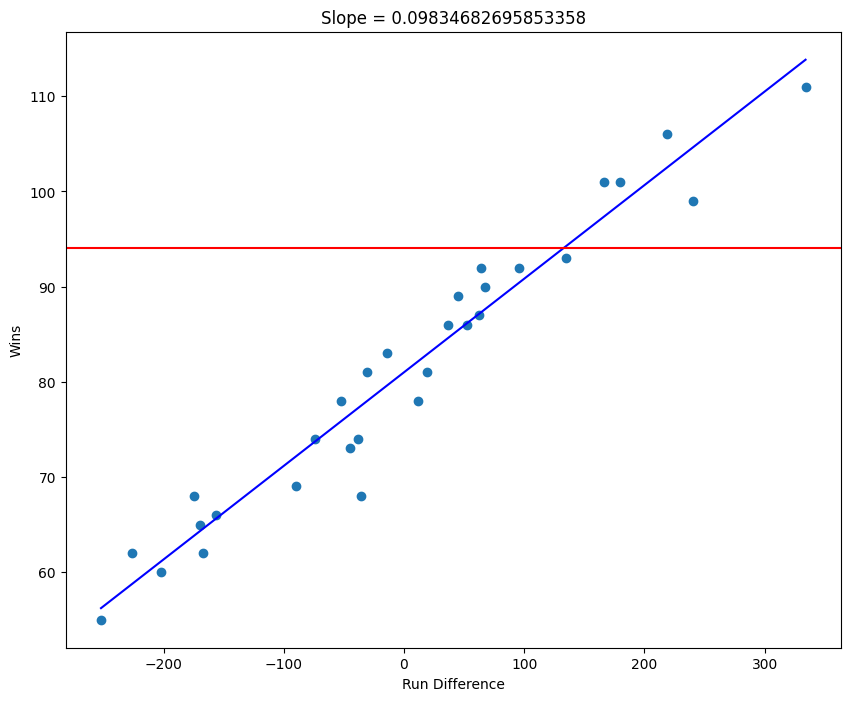

In [ ]:
#RD Correlated to Wins?
x = combined_data['RD']
y = combined_data['W']
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
print(np.corrcoef(x,y))
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Run Difference")
plt.ylabel("Wins")
plt.axhline(y=94.1, color='red')
plt.show()


[[1.         0.67542351]
 [0.67542351 1.        ]]


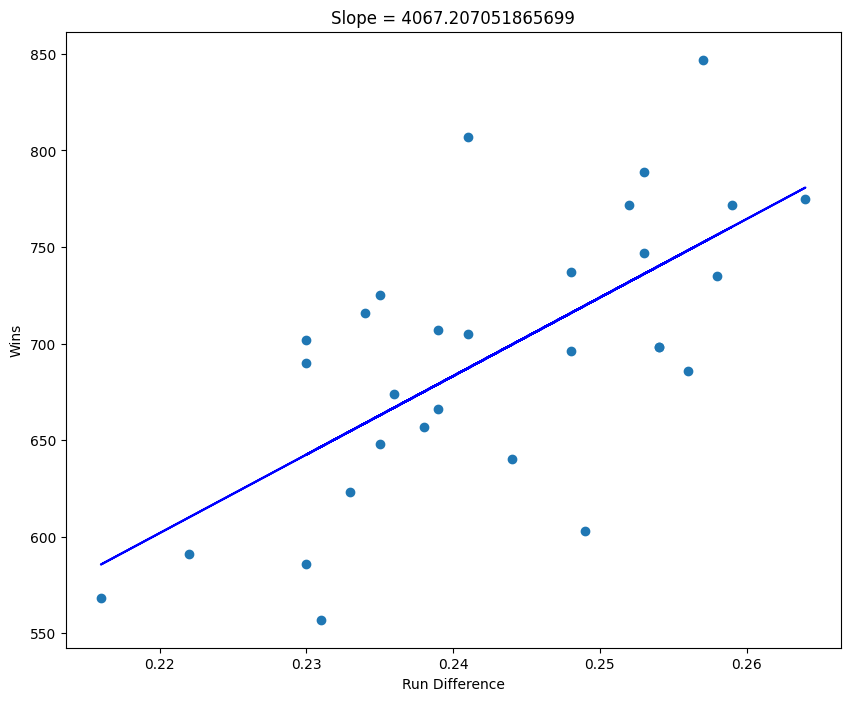

In [ ]:
#AVG Correlated to Runs Scored
x = combined_data['AVG']
y = combined_data['R']
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
print(np.corrcoef(x,y))
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Run Difference")
plt.ylabel("Wins")

plt.show()

[[1.         0.95330814]
 [0.95330814 1.        ]]


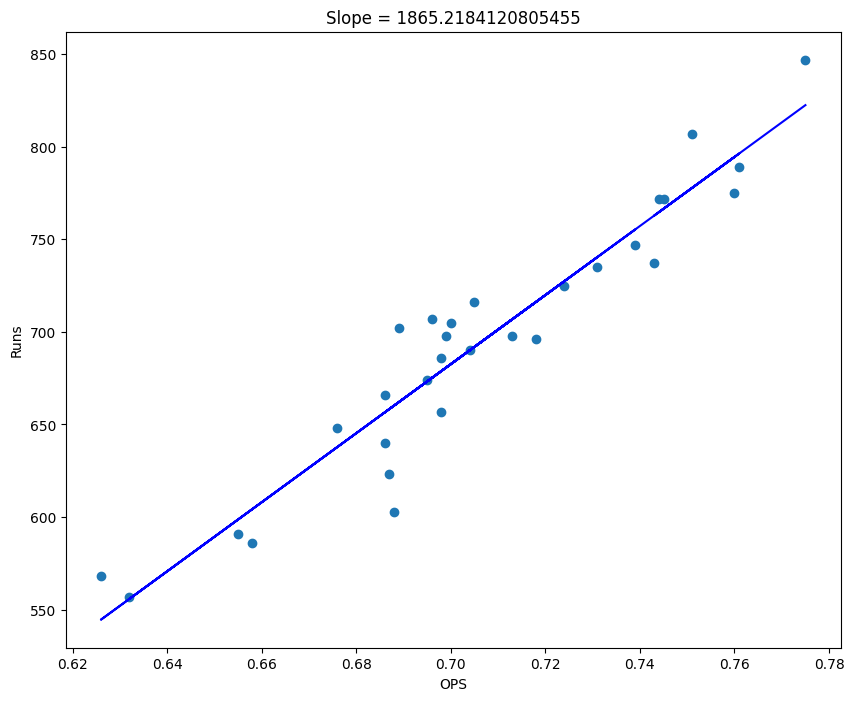

In [ ]:
#OPS Correlated to Runs Scored
x = combined_data['OPS']
y = combined_data['R']
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
print(np.corrcoef(x,y))
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("OPS")
plt.ylabel("Runs")

plt.show()

[[1.         0.82556676]
 [0.82556676 1.        ]]


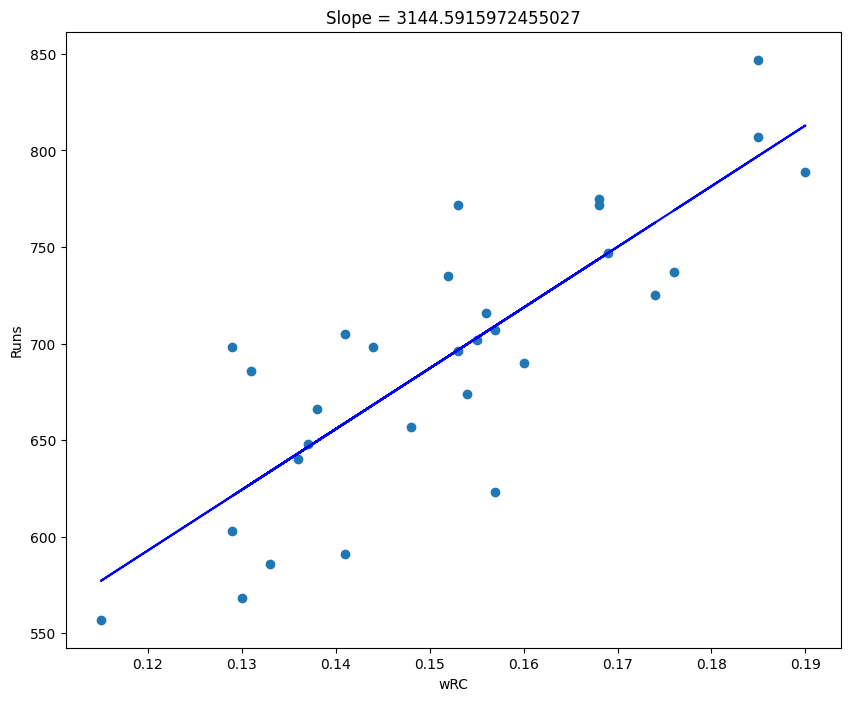

In [ ]:
#wRC Correlated to Runs Scored
x = combined_data['ISO']
y = combined_data['R']
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
print(np.corrcoef(x,y))
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("wRC")
plt.ylabel("Runs")

plt.show()

[[1.         0.98705398]
 [0.98705398 1.        ]]


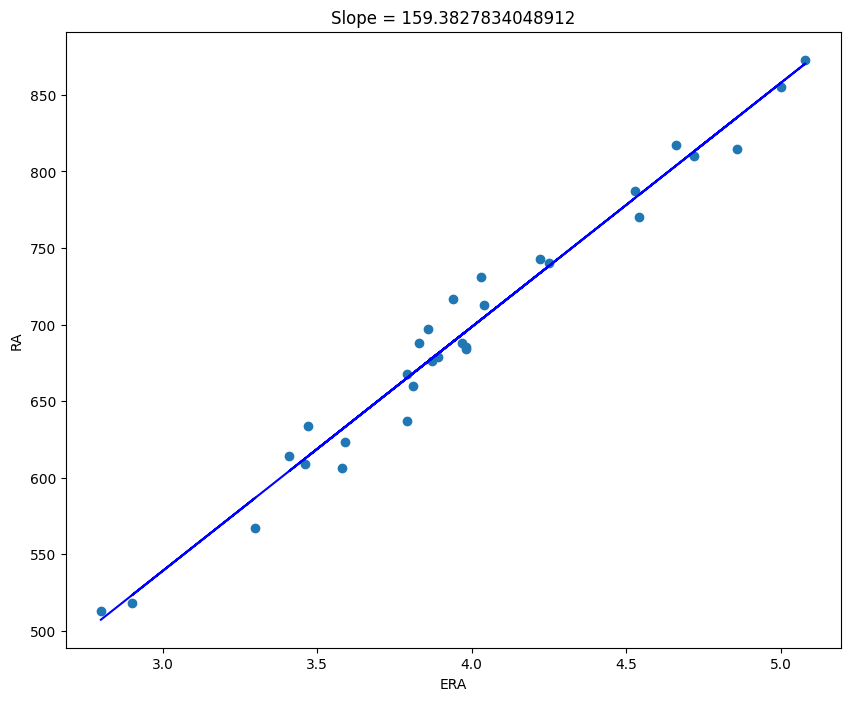

In [ ]:
#AVG Correlated to Runs Scored
x = combined_data['ERA']
y = combined_data['RA']
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
print(np.corrcoef(x,y))
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("ERA")
plt.ylabel("RA")

plt.show()

[[ 1.        -0.7406187]
 [-0.7406187  1.       ]]


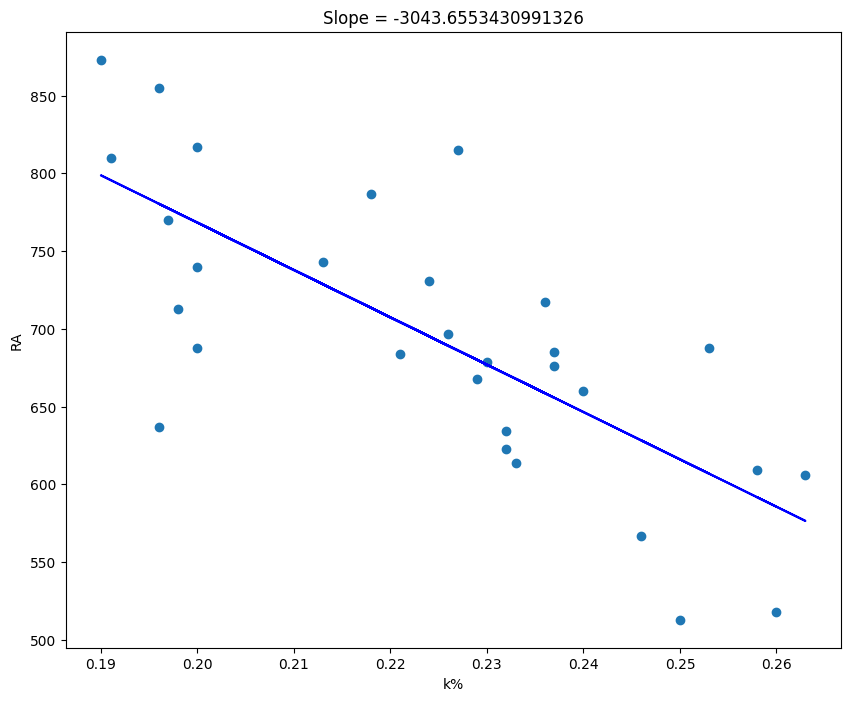

In [ ]:
#AVG Correlated to Runs Scored
x = combined_data['PK%']
y = combined_data['RA']
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
print(np.corrcoef(x,y))
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("k%")
plt.ylabel("RA")

plt.show()

In [ ]:

from sklearn.linear_model import LinearRegression

#corr_matrix = combined_data.corr()
#print(corr_matrix)
# Extracting our variables from the dataframe.
x = combined_data[['OPS','ISO']].values
y = combined_data[['R']].values
# Calling our model object.
RS_model = LinearRegression()
# Fitting the model.
RS_model.fit(x,y)
# Printing model intercept and coefficients.
print(RS_model.intercept_)
print(RS_model.coef_)

#RS = -566.72 + 1704.81*OPS + 373.1*ISO


[-566.71941185]
[[1704.80506234  374.10199935]]


In [ ]:
x = combined_data[['ERA','PK%']].values
y = combined_data[['RA']].values
# Calling our model object.
RA_model = LinearRegression()
# Fitting the model.
RA_model.fit(x,y)
# Printing model intercept and coefficients.
print(RA_model.intercept_)
print(RA_model.coef_)

#RA = 69.24+158.66*ERA-24.49*K%
[[[[]]]]

[69.23629896]
[[158.66352481 -24.48358076]]


[[[[]]]]

In [ ]:
# Extracting our variables from the dataframe.
x = combined_data[['RD']].values
y = combined_data[['W']].values
# Calling our model object.
W_model = LinearRegression()
# Fitting the model.
W_model.fit(x,y)
# Printing model intercept and coefficients.
print(W_model.intercept_)
print(W_model.coef_)

#Wins = 81 + .1*RD

[81.]
[[0.09834683]]


In [ ]:
#O's Offensive Stats: OPS:.695 ISO:.154
#O's Defensive Stats: ERA:3.97 K%:.2
#RS
print("Runs Scored = -566.72 + 1704.81*.695 + 373.1*.195 =", -566.72 + (1704.81*.695) + (373.1*.195))
#RA
print("Runs Against = 69.24 + 158.66 * 3.97 - 24.49*.2 =",69.24+(158.66*3.97)-(24.49*.2))
print("RD = 690-694=",690-694)

print(W_model.predict([[-4]]))
print("Expected Wins:81")

Runs Scored = -566.72 + 1704.81*.695 + 373.1*.195 = 690.87745
Runs Against = 69.24 + 158.66 * 3.97 - 24.49*.2 = 694.2222
RD = 690-694= -4
[[80.60661269]]
Expected Wins:81


In [ ]:
# Get team batting stats for all years
data = team_batting(2023)
#for x in data:
#    print(x)
data = data.loc[:,['Team','AVG','R','OPS','ISO','wRC']]
data.head(5)

data_p = team_pitching(2023)

data_p = data_p.loc[:,['Team','W','L','R','ERA','BB%','K%','WHIP']]
data_p = data_p.rename(columns={'R':'RA', 'BB%':'PBB%','K%':'PK%'})
combined_data = pd.concat([data, data_p], ignore_index=True).groupby('Team').sum().reset_index()
combined_data['RD'] = combined_data['R']-combined_data['RA']
combined_data =combined_data.sort_values('RD', ascending=False)
combined_data_bal = combined_data[combined_data['Team']=='BAL']
print(combined_data_bal)

#RS = -566.72 + 1704.81*OPS + 373.1*ISO
#RA = 69.24+158.66*ERA-24.49*K%
#Wins = 81 + .1*RD
#2023 Stats
print("RS = -566.72 + 1704.81*.777 + 373.1*.175=",-566.72 + 1704.81*.777 + 373.1*.175)
print("RA = 69.24 + 158.66*4.55-24.49*.238=",69.24 + 158.66*4.55-24.49*.238)
print("RD = 823.21-785.31=", 823.21-785.31)
print(W_model.predict([[37]]))
print("Expected Wins:85")

  Team   AVG      R    OPS    ISO    wRC     W     L     RA   ERA   PBB%  \
2  BAL  0.25  200.0  0.745  0.164  194.0  26.0  14.0  170.0  4.07  0.086   

    PK%  WHIP    RD  
2  0.24  1.29  30.0  
RS = -566.72 + 1704.81*.777 + 373.1*.175= 823.2098699999999
RA = 69.24 + 158.66*4.55-24.49*.238= 785.3143799999999
RD = 823.21-785.31= 37.90000000000009
[[84.6388326]]
Expected Wins:85


In [ ]:
data = team_batting(2023)
for x in data:
    print(x)
data = data.loc[:,['Team','AVG','R','OPS','ISO','wRC']]
data.head(5)

data_p = team_pitching(2023)

data_p = data_p.loc[:,['Team','W','L','R','ERA','BB%','K%','WHIP']]
data_p = data_p.rename(columns={'R':'RA', 'BB%':'PBB%','K%':'PK%'})
combined_data = pd.concat([data, data_p], ignore_index=True).groupby('Team').sum().reset_index()
combined_data['RD'] = combined_data['R']-combined_data['RA']
combined_data =combined_data.sort_values('RD', ascending=False)
combined_data_east = combined_data.loc[(combined_data['Team']=='BAL') | 
                                  (combined_data['Team']=='NYY') |
                                  (combined_data['Team']=='BOS') |
                                  (combined_data['Team']=='TOR') |
                                  (combined_data['Team']=='TBR')]

#BOS
print("BOS RD=",(-566.72 + 1704.81*.8 + 373.1*.192)-(69.24+158.66*4.81-24.49*.224))
print(W_model.predict([[42]]))
#NYY
print("NYY RD=",(-566.72 + 1704.81*.678 + 373.1*.153)-(69.24+158.66*3.59-24.49*.255))
print(W_model.predict([[13.7]]))
#TOR
print("TOR RD=",(-566.72 + 1704.81*.737 + 373.1*.154)-(69.24+158.66*4.22-24.49*.248))
print(W_model.predict([[14.5]]))
#TB
print("TB RD=",(-566.72 + 1704.81*.877 + 373.1*.251)-(69.24+158.66*2.9-24.49*.251))
print(W_model.predict([[489.8]]))




teamIDfg
Season
Team
Age
G
AB
PA
H
1B
2B
3B
HR
R
RBI
BB
IBB
SO
HBP
SF
SH
GDP
SB
CS
AVG
GB
FB
LD
IFFB
Pitches
Balls
Strikes
IFH
BU
BUH
BB%
K%
BB/K
OBP
SLG
OPS
ISO
BABIP
GB/FB
LD%
GB%
FB%
IFFB%
HR/FB
IFH%
BUH%
wOBA
wRAA
wRC
Bat
Fld
Rep
Pos
RAR
WAR
Dol
Spd
wRC+
WPA
-WPA
+WPA
RE24
REW
pLI
phLI
PH
WPA/LI
Clutch
FB% (Pitch)
FBv
SL%
SLv
CT%
CTv
CB%
CBv
CH%
CHv
SF%
SFv
KN%
KNv
XX%
PO%
wFB
wSL
wCT
wCB
wCH
wSF
wKN
wFB/C
wSL/C
wCT/C
wCB/C
wCH/C
wSF/C
wKN/C
O-Swing%
Z-Swing%
Swing%
O-Contact%
Z-Contact%
Contact%
Zone%
F-Strike%
SwStr%
BsR
FA% (sc)
FT% (sc)
FC% (sc)
FS% (sc)
FO% (sc)
SI% (sc)
SL% (sc)
CU% (sc)
KC% (sc)
EP% (sc)
CH% (sc)
SC% (sc)
KN% (sc)
UN% (sc)
vFA (sc)
vFT (sc)
vFC (sc)
vFS (sc)
vFO (sc)
vSI (sc)
vSL (sc)
vCU (sc)
vKC (sc)
vEP (sc)
vCH (sc)
vSC (sc)
vKN (sc)
FA-X (sc)
FT-X (sc)
FC-X (sc)
FS-X (sc)
FO-X (sc)
SI-X (sc)
SL-X (sc)
CU-X (sc)
KC-X (sc)
EP-X (sc)
CH-X (sc)
SC-X (sc)
KN-X (sc)
FA-Z (sc)
FT-Z (sc)
FC-Z (sc)
FS-Z (sc)
FO-Z (sc)
SI-Z (sc)
SL-Z (sc)
CU-Z (sc)
KC-Z (sc)
EP-Z

In [ ]:
combined_data_central = combined_data.loc[(combined_data['Team']=='CHW') | 
                                  (combined_data['Team']=='CLE') |
                                  (combined_data['Team']=='DET') |
                                  (combined_data['Team']=='KCR') |
                                  (combined_data['Team']=='MIN')]
print(combined_data_central)
print("MIN RD=",(-566.72 + 1704.81*.699 + 373.1*.172)-(69.24+158.66*3.33-24.49*.267))
print(W_model.predict([[98]]))
print("CLE RD=",(-566.72 + 1704.81*.636 + 373.1*.109)-(69.24+158.66*3.89-24.49*.194))
print(W_model.predict([[-123]]))
print("DET RD=",(-566.72 + 1704.81*.648 + 373.1*.129)-(69.24+158.66*4.5-24.49*.208))
print(W_model.predict([[-191]]))
print("CHW RD=",(-566.72 + 1704.81*.673 + 373.1*.141)-(69.24+158.66*5.6-24.49*.253))
print(W_model.predict([[-318]]))
print("KCR RD=",(-566.72 + 1704.81*.675 + 373.1*.149)-(69.24+158.66*5.83-24.49*.217))
print(W_model.predict([[-349]]))
print("AL Central PREDICTIONS: \n 1.MIN-98 \n 2.CLE68 \n 3:DET 62 \n 4:CHW 49 \n 5:KCR 46")

   Team    AVG      R    OPS    ISO    wRC     W     L     RA   ERA   PBB%  \
16  MIN  0.228  191.0  0.714  0.179  178.0  23.0  18.0  148.0  3.29  0.081   
7   CLE  0.228  142.0  0.645  0.114  139.0  19.0  21.0  165.0  3.71  0.074   
9   DET  0.231  139.0  0.649  0.124  139.0  18.0  21.0  183.0  4.41  0.077   
11  KCR  0.237  173.0  0.697  0.160  170.0  12.0  30.0  233.0  5.44  0.093   
5   CHW  0.237  175.0  0.686  0.149  167.0  14.0  28.0  246.0  5.55  0.101   

      PK%  WHIP    RD  
16  0.267  1.14  43.0  
7   0.197  1.25 -23.0  
9   0.205  1.22 -44.0  
11  0.219  1.43 -60.0  
5   0.241  1.49 -71.0  
MIN RD= 98.07641999999964
[[90.63798904]]
CLE RD= -123.46927999999991
[[68.90334028]]
DET RD= -191.98930000000007
[[62.21575605]]
CHW RD= -318.31579999999997
[[49.72570903]]
KCR RD= -349.29481999999996
[[46.67695739]]
AL Central PREDICTIONS: 
 1.MIN-98 
 2.CLE68 
 3:DET 62 
 4:CHW 49 
 5:KCR 46


In [ ]:

combined_data_west = combined_data.loc[(combined_data['Team']=='HOU') | 
                                  (combined_data['Team']=='LAA') |
                                  (combined_data['Team']=='SEA') |
                                  (combined_data['Team']=='TEX') |
                                  (combined_data['Team']=='OAK')]
print(combined_data_west)
print("TEX RD=",(-566.72 + 1704.81 * .786 + 373.1* .186 )-(69.24+158.66* 3.74 -24.49 * .229 ))
print(W_model.predict([[185]]))
print("LAA RD=",(-566.72 + 1704.81 * .755 + 373.1* .162 )-(69.24+158.66* 3.81 -24.49 * .233 ))
print(W_model.predict([[68]]))
print("HOU RD=",(-566.72 + 1704.81 * .682 + 373.1* .130 )-(69.24+158.66* 3.35 -24.49 * .259 ))
print(W_model.predict([[50]]))
print("SEA RD=",(-566.72 + 1704.81 * .671 + 373.1* .154 )-(69.24+158.66* 3.52 -24.49 * .24 ))
print(W_model.predict([[12]]))
print("OAK RD=",(-566.72 + 1704.81 * .689 + 373.1* .147 )-(69.24+158.66* 7.39 -24.49 * .176 ))
print(W_model.predict([[-574]]))
print("AL West PREDICTIONS: \n 1.TEX-99 \n 2.LAA-87 \n 3:HOU-85 \n 4:SEA 82 \n 5:OAK 24")

   Team    AVG      R    OPS    ISO    wRC     W     L     RA   ERA   PBB%  \
27  TEX  0.266  254.0  0.783  0.179  218.0  25.0  15.0  157.0  3.61  0.079   
23  SEA  0.225  174.0  0.675  0.146  158.0  20.0  20.0  150.0  3.30  0.073   
10  HOU  0.238  171.0  0.672  0.127  155.0  21.0  19.0  147.0  3.31  0.075   
12  LAA  0.258  209.0  0.747  0.159  201.0  21.0  20.0  200.0  4.32  0.093   
19  OAK  0.231  159.0  0.695  0.153  177.0   9.0  33.0  316.0  7.27  0.118   

      PK%  WHIP     RD  
27  0.234  1.17   97.0  
23  0.243  1.15   24.0  
10  0.260  1.20   24.0  
12  0.222  1.31    9.0  
19  0.180  1.69 -157.0  
TEX RD= 185.63706999999988
[[99.19416299]]
LAA RD= 112.82532000000003
[[87.68758423]]
HOU RD= 50.05533000000014
[[85.91734135]]
SEA RD= 12.819309999999973
[[82.18016192]]
OAK RD= -574.6873700000002
[[24.54892133]]
AL West PREDICTIONS: 
 1.TEX-99 
 2.LAA-87 
 3:HOU-85 
 4:SEA 82 
 5:OAK 24


In [ ]:
print("AL  PREDICTIONS:\nDiv Winners: Rays, Twins, Rangers \nWild Cards: Angels, 3 way tie between Houston, Boston, Birdies")

AL  PREDICTIONS:
Div Winners: Rays, Twins, Rangers 
Wild Cards: Angels, 3 way tie between Houston, Boston, Birdies
